## 数据挖掘-2023 互评作业三：基于支持向量机的手写数字识别

[仓库地址](https://github.com/lyl2000/data-mining)

### 读取 MNIST 数据：加载并处理手写数字图像数据及其对应的标签。

MNIST这类常用数据集有很多可用的数据加载接口可供使用

In [41]:
import tensorflow as tf

mint = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mint.load_data()

### 划分训练集和测试集：将图像数据划分为训练集和测试集，比例一般为7:3或8:2。

MNIST数据集本身划分了训练集和测试集，按6:1的比例

In [42]:
len(x_train), len(y_train), len(x_test), len(y_test)

(60000, 60000, 10000, 10000)

### 特征缩放：对图像数据进行归一化处理，缩放到[0,1]范围。

源数据为[0,255]，将其除以255进行归一化到[0,1]

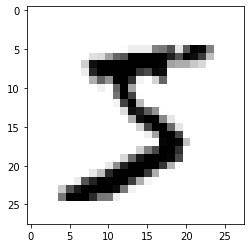

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

In [43]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="binary")
plt.show()
print(y_train[0])

print(x_train[0])
x_train = x_train / 255
x_test = x_test / 255
print(x_train[0])

### 构建支持向量机模型：选择适当的核函数（如线性核、多项式核、径向基核等），训练模型。

In [26]:
from sklearn.svm import SVC
import numpy as np


x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
# 构建支持向量机模型，采用径向基函数作为核函数
model = SVC(gamma='scale', C=1.0, decision_function_shape='ovr', kernel='rbf')
# 训练模型
model.fit(x_train, y_train)
# 预测结果
pred = model.predict(x_test)
# 准确率估计
accurancy = np.sum(np.equal(pred, y_test)) / len(x_test)
print(accurancy)

0.9792


### 模型评估：在测试集上进行预测，计算模型的准确率、召回率、F 1 值等指标，评估模型性能。

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('准确率:', accuracy_score(y_test, pred))
print('精确率:', precision_score(y_test, pred, average='weighted'))
print('召回率:', recall_score(y_test, pred, average='weighted'))
print('F1值:', f1_score(y_test, pred, average='weighted'))

准确率: 0.9792
精确率: 0.9792006017788697
召回率: 0.9792
F1值: 0.9791856837674859


由于MNIST数据集数据分布较为均衡，因此accuracy，precision和recall之间并没有太大差异